In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy as np
import numpy.random as nprand
import math
import scipy
import time
import math
from scipy import io
from scipy import stats
from datetime import datetime

In [2]:
movie_data = pandas.read_csv('movie_training_data/user_ratedmovies_train.dat','\t')
print 'movie_data size: {}'.format(len(movie_data))

# create a test/train split
val_size = 85000

all_inds = np.random.permutation( range(0,len(movie_data)) )
val_inds = all_inds[0:val_size]
train_inds = all_inds[val_size:len(movie_data)]

movie_data_val = movie_data.iloc[ val_inds ]
movie_data_train = movie_data.iloc[ train_inds ]

movie_data size: 770598


In [3]:
train = movie_data_train.as_matrix()
train = train[:,1:4] # get only the userID, movieID, and rating
val = movie_data_val.as_matrix()
val = val[:,1:4] # get only the userID, movieID, and rating
movie_data[:10]

,Unnamed: 0,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,280497,23437,3596,3.0,4,2,2007,22,50,57
1,33926,3104,6286,4.5,21,12,2005,4,33,43
2,19460,1915,34162,3.0,14,10,2008,4,12,32
3,651821,52722,4673,3.0,4,8,2006,8,54,32
4,330862,27112,3098,4.0,27,10,2008,1,45,23
5,309767,25408,4844,3.5,17,2,2004,12,40,3
6,148331,12296,6879,3.5,13,4,2004,23,3,40
7,482225,38662,1674,4.0,21,12,2002,5,33,13
8,784028,65500,6595,1.0,15,1,2005,6,23,4
9,818172,68986,1959,3.5,5,5,2008,7,48,33


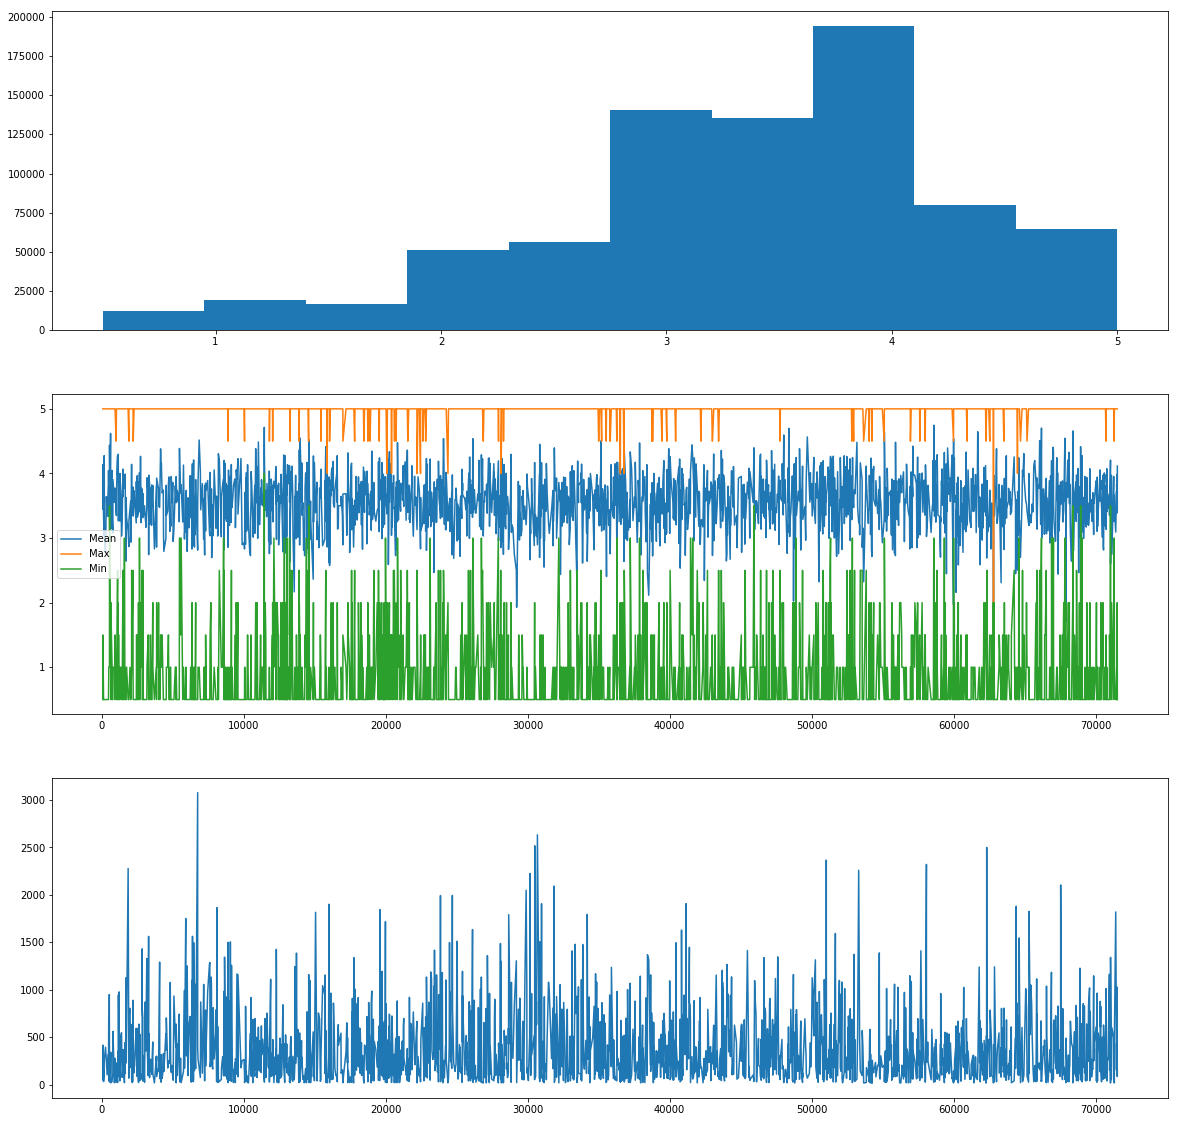

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(20, 20))
axs[0].hist( movie_data['rating'], 10 )

users = movie_data.groupby('userID')
axs[1].plot(users['rating'].aggregate(np.mean), label='Mean')
axs[1].plot(users['rating'].aggregate(np.max), label='Max')
axs[1].plot(users['rating'].aggregate(np.min), label='Min')
axs[1].legend()

axs[2].plot(users.size())

plt.show()

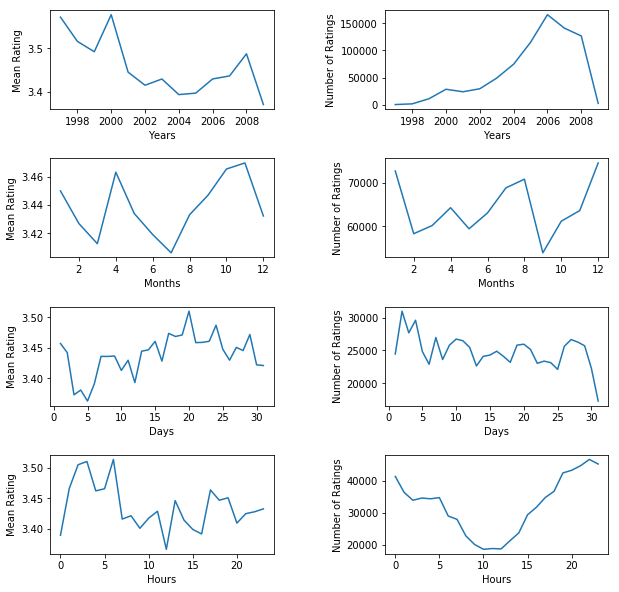

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

years = movie_data.groupby('date_year')
axs[0,0].plot(years['rating'].aggregate(np.mean))
axs[0,0].set_xlabel('Years')
axs[0,0].set_ylabel('Mean Rating')
axs[0,1].plot(years.size())
axs[0,1].set_xlabel('Years')
axs[0,1].set_ylabel('Number of Ratings')

months = movie_data.groupby('date_month')
axs[1,0].plot(months['rating'].aggregate(np.mean))
axs[1,0].set_xlabel('Months')
axs[1,0].set_ylabel('Mean Rating')
axs[1,1].plot(months.size())
axs[1,1].set_xlabel('Months')
axs[1,1].set_ylabel('Number of Ratings')

days = movie_data.groupby('date_day')
axs[2,0].plot(days['rating'].aggregate(np.mean))
axs[2,0].set_xlabel('Days')
axs[2,0].set_ylabel('Mean Rating')
axs[2,1].plot(days.size())
axs[2,1].set_xlabel('Days')
axs[2,1].set_ylabel('Number of Ratings')

hours = movie_data.groupby('date_hour')
axs[3,0].plot(hours['rating'].aggregate(np.mean))
axs[3,0].set_xlabel('Hours')
axs[3,0].set_ylabel('Mean Rating')
axs[3,1].plot(hours.size())
axs[3,1].set_xlabel('Hours')
axs[3,1].set_ylabel('Number of Ratings')

fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

In [48]:
mean_rating = movie_data['rating'].aggregate(np.mean)
print mean_rating

year_means = years['rating'].aggregate(np.mean) - mean_rating
print year_means
print year_means[1997]

month_means = movie_data.groupby('date_month')['rating'].aggregate(np.mean).as_matrix() - mean_rating
print month_means

hour_means = hours['rating'].aggregate(np.mean).as_matrix() - mean_rating
print hour_means

3.43810002102
date_year
1997    0.133551
1998    0.077656
1999    0.053816
2000    0.139175
2001    0.006690
2002   -0.023388
2003   -0.009045
2004   -0.044995
2005   -0.041534
2006   -0.008912
2007   -0.001936
2008    0.048981
2009   -0.067904
Name: rating, dtype: float64
0.13355106932
[ 0.01188759 -0.01134357 -0.02565965  0.02524913 -0.00418095 -0.01915881
 -0.03214252 -0.00504028  0.00888176  0.02751476  0.03183141 -0.00593689]
[-0.04915733  0.02790444  0.06677011  0.07209462  0.02380918  0.02727961
  0.07542655 -0.02255489 -0.01712131 -0.03775168 -0.02104822 -0.00973326
 -0.07228021  0.00781163 -0.02424945 -0.03961146 -0.04704183  0.02535886
  0.00839283  0.01239655 -0.02925941 -0.01369535 -0.01057577 -0.00580882]


In [12]:
movie_genres = pandas.read_csv('movie_training_data/movie_genres.dat','\t')
movie_genres[:10]

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


In [6]:
users = movie_data['userID'].unique()
userSize = len(users)
print 'Number of Users: {}'.format(userSize)
movies = movie_data['movieID'].unique()
movieSize = len(movies)
print 'Number of Movies: {}'.format(movieSize)

id2user = {}
for i, user in enumerate(users):
    id2user[user] = i

id2movie = {}
for i, movie in enumerate(movies):
    id2movie[movie] = i

Number of Users: 2113
Number of Movies: 10042


In [52]:
class recommender():
    def __init__(self, ubreg=0.0, mbreg=0.0, ureg=0.0, mreg=0.0, gbreg=0.0, 
                 datafile='movie_training_data/user_ratedmovies_train.dat'):
        self.movie_data = pandas.read_csv(datafile,'\t')
        print 'movie_data size: {}'.format(len(self.movie_data))
        # create a test/train split
        val_size = 85000

        all_inds = nprand.permutation( range(0,len(self.movie_data)) )
        val_inds = all_inds[0:val_size]
        train_inds = all_inds[val_size:len(self.movie_data)]

        val = self.movie_data.iloc[ val_inds ].as_matrix()
        self.val_data = val[:,1:] # get all but the id
        train = self.movie_data.iloc[ train_inds ].as_matrix()
        self.train_data = train[:,1:] # get all but the id

        users = self.movie_data['userID'].unique()
        self.userSize = len(users)
        # print 'Number of Users: {}'.format(userSize)
        movies = self.movie_data['movieID'].unique()
        self.movieSize = len(movies)
        # print 'Number of Movies: {}'.format(movieSize)
        self.id2user = {}
        for i, user in enumerate(users):
            self.id2user[user] = i
        self.id2movie = {}
        for i, movie in enumerate(movies):
            self.id2movie[movie] = i

        self.ubreg = ubreg
        self.mbreg = mbreg
        self.ureg = ureg
        self.mreg = mreg
        self.gbreg = gbreg
        # global_bias is the average rating
        self.global_bias = np.mean(self.train_data[:,2])
        self.year_bias = self.movie_data.groupby('date_year')['rating'].aggregate(np.mean) - self.global_bias
        self.month_bias = self.movie_data.groupby('date_month')['rating'].aggregate(np.mean) - self.global_bias
#         self.hour_bias = movie_data.groupby('date_hour')['rating'].aggregate(np.mean).as_matrix() - mean_rating

        self.ufeat = None
        self.mfeat = None
        self.ubias = None
        self.mbias = None

    def reset(self, features):
        self.ufeat = nprand.normal(scale=1./features, size=(self.userSize, features))
        self.mfeat = nprand.normal(scale=1./features, size=(self.movieSize, features))
        self.ubias = np.zeros(self.userSize)
        self.mbias = np.zeros(self.movieSize)

    def predict(self, vec):
        uind = self.id2user[vec[0]]
        mind = self.id2movie[vec[1]]
        retval = np.dot(self.ufeat[uind], self.mfeat[mind])
        retval += self.global_bias + self.month_bias[vec[4]] + self.year_bias[vec[5]]
        if self.ubias[uind] is not None:
            retval += self.ubias[uind]
        if self.mbias[mind] is not None:
            retval += self.mbias[mind]
        return retval

    def train(self, features=10, lr=1e-3, iterations=100000):
        start_time = time.time()
        for it in range(iterations):
            rum = self.train_data[nprand.randint(0,self.train_data.shape[0])]
            uind = self.id2user[rum[0]]
            mind = self.id2movie[rum[1]]
            loss = (rum[2] - self.predict(rum))

            # self.global_bias += lr * (loss - self.global_bias * self.gbreg)
            self.ubias[uind] += lr * (loss - self.ubias[uind] * self.ubreg)
            self.mbias[mind] += lr * (loss - self.mbias[mind] * self.mbreg)
            self.ufeat[uind] = lr * (loss * self.mfeat[mind] - self.ureg * self.ufeat[uind])
            self.mfeat[mind] = lr * (loss * self.ufeat[uind] - self.mreg * self.mfeat[mind])

            # the calculations from the slides
            # self.ubias[uind] -= lr * (loss + self.ubias[uind] * self.ubreg)
            # self.mbias[mind] -= lr * (loss + self.mbias[mind] * self.mbreg)
            # self.ufeat[uind] -= lr * (loss * self.mfeat[mind] + self.ureg * self.ufeat[uind])
            # self.mfeat[mind] -= lr * (loss * self.ufeat[uind] + self.mreg * self.mfeat[mind])

            # lr *= 0.999
            # lr -= 0.001
        print( "Time to train: {}".format(time.time() - start_time) )

    def predict_set(self, dataset):
        predictions = np.zeros(dataset.shape[0])
        start_time = time.time()
        for it in range(dataset.shape[0]):
            rum = dataset[it]
            uind = self.id2user[rum[0]]
            mind = self.id2movie[rum[1]]
            predictions[it] += self.predict(rum)
        print( "Time to evaluate: {}".format(time.time() - start_time) )
        return predictions

    def get_rmse(self, testset='validation'):
        if 'train' in testset:
            dataset = self.train_data
        elif 'val' in testset:
            dataset = self.val_data

        predictions = self.predict_set(dataset)
        rmse = np.sqrt(np.mean(np.power(dataset[:,2] - predictions, 2)))
        return rmse

    def explicit_train(self, features=10, lr=1e-4, iterations=100000, divisions=10):
        print 'Training'
        if self.ufeat is None:
            self.reset(features)
        print_every = iterations / divisions
        rmses = np.zeros(divisions+1)
        rmses[0] += self.get_rmse()
        for i in range(divisions):
            self.train(lr=lr, iterations=print_every)
            rmses[i+1] += self.get_rmse()
        return rmses
system = recommender(0.01, 0.01, 0.01, 0.01, 0.01)

movie_data size: 770598


In [ ]:
rmses = system.explicit_train(lr=1e-4, iterations=1000000)
plt.plot(rmses)
plt.show()

Training
Time to evaluate: 3.2929019928
Time to train: 25.9176399708
Time to evaluate: 2.84019613266
Time to train: 26.6958351135
Time to evaluate: 2.9448788166
Time to train: 27.2462801933
Time to evaluate: 2.90419697762
Time to train: 26.1874010563
Time to evaluate: 2.94944310188


In [19]:
rum = movie_data_train.iloc[nprand.randint(0,len(movie_data_train))]
print rum
print rum[0]
print rum[-1]
print movie_data_train.iloc[:10,-1]

Unnamed: 0     470759.0
userID          37580.0
movieID            76.0
rating              4.5
date_day           31.0
date_month          3.0
date_year        2007.0
date_hour          13.0
date_minute        40.0
date_second         9.0
Name: 497608, dtype: float64
470759.0
9.0
510809    20
548658    51
551987    33
716774    52
425948    18
736248    43
213186    15
269307    14
346280    26
634507    29
Name: date_second, dtype: int64
